In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)

In [2]:
DROP_COLUMNS = ['City', 'DeviceId', 'LocationName', 'Latitude', 'Longitude']

def drop_rows_with_any_missing_data(df):
    missing_any_values_mask = df.isna().any(axis=1)
    print("deleting {} rows with missing values".format(missing_any_values_mask.sum()))
    return df[~missing_any_values_mask]

def convert_to_chicago_time(df):
    df['ReadingDateTimeCT'] = (
        pd.to_datetime(df['ReadingDateTimeUTC'], utc=True)
        .dt.tz_convert('America/Chicago')
        .dt.tz_localize(None)
    )
    df = df.drop(columns=['ReadingDateTimeUTC'])
    return df

df = (
    pd.read_csv('irving-clark-sensor.csv')
    .pipe(drop_rows_with_any_missing_data)
    .pipe(convert_to_chicago_time)
    .set_index('ReadingDateTimeCT')
    .sort_index()
    .drop(columns=DROP_COLUMNS)
)

deleting 61 rows with missing values


(-2.0, 31.873501534543514)

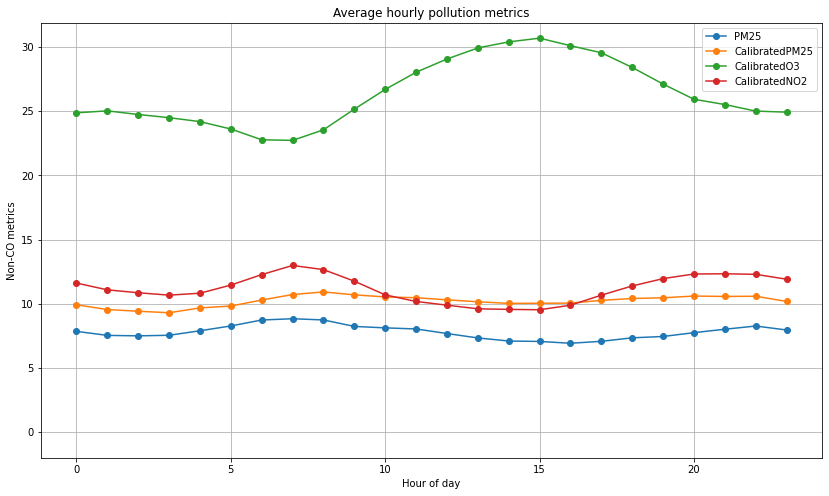

In [3]:
pollution_metric_cols = ['PM25', 'CalibratedPM25', 'CalibratedO3', 'CalibratedNO2']
ax = df.groupby(df.index.hour)[pollution_metric_cols[:4]].mean().plot(style='-o')
ax.grid()
ax.set_ylabel('Non-CO metrics')
ax.set_xlabel('Hour of day')
ax.set_title('Average hourly pollution metrics')
ax.set_ylim(bottom=-2)

# cubs home games

In [34]:
df_cubs = pd.read_csv('GameTicketPromotionPrice.csv')

cubs_game_dates = pd.to_datetime(
    pd.read_csv('GameTicketPromotionPrice.csv')['START DATE']
)
cubs_game_mask = pd.to_datetime(df.index.date).isin(cubs_game_dates)

baseball_season_month_start = 4
baseball_season_month_end = 9
baseball_season_mask = (
    (df.index.month >= baseball_season_month_start)
    & (df.index.month <= baseball_season_month_end)
)

<ipython-input-34-86c9b28b600c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cubs_game_dates = pd.to_datetime(


Text(0.5, 1.0, 'Averge hourly pollution metrics, by Cubs game night')

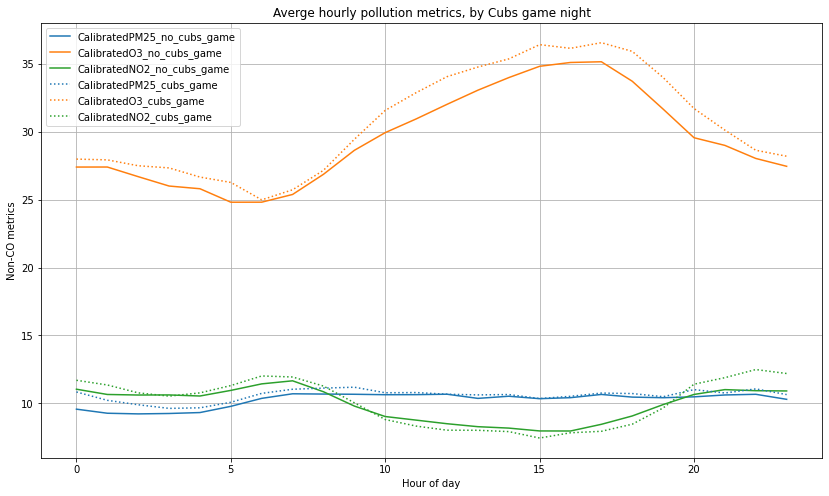

In [79]:
def append_to_cols(df, appendix):
    df = df.rename(columns={col: col + '_' + appendix for col in df.columns})
    return df

pollution_metric_cols = ['CalibratedPM25', 'CalibratedO3', 'CalibratedNO2']

fig,ax = plt.subplots()

(
    df[baseball_season_mask & ~cubs_game_mask].groupby(df[baseball_season_mask & ~cubs_game_mask].index.hour)
    [pollution_metric_cols[:4]].mean()
    .pipe(append_to_cols, 'no_cubs_game')
    .plot(ax=ax)
)
(
    df[baseball_season_mask & cubs_game_mask].groupby(df[baseball_season_mask & cubs_game_mask].index.hour)
    [pollution_metric_cols[:4]].mean()
    .pipe(append_to_cols, 'cubs_game')
    .plot(ax=ax, style=':', color=['C0', 'C1', 'C2', 'C3'])
)
ax.grid()
ax.set_ylabel('Non-CO metrics')
ax.set_xlabel('Hour of day')
ax.set_title('Averge hourly pollution metrics, by Cubs game night')

Text(0.5, 1.0, 'Averge hourly pollution metrics, by Cubs game night')

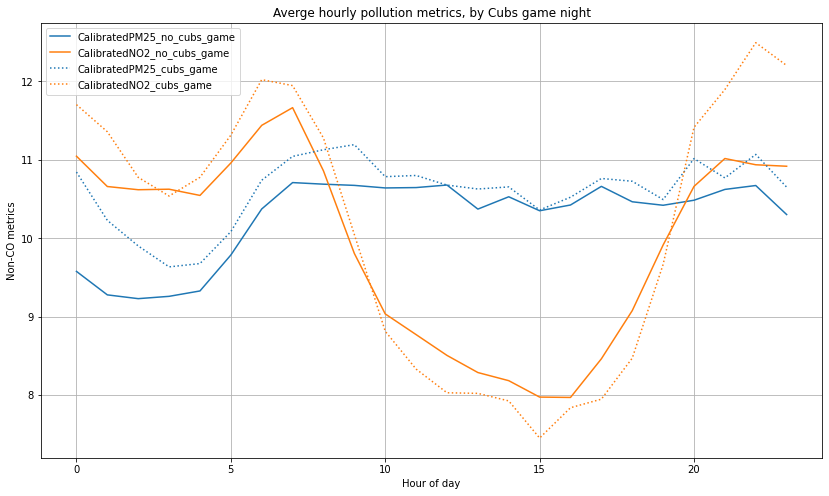

In [80]:
def append_to_cols(df, appendix):
    df = df.rename(columns={col: col + '_' + appendix for col in df.columns})
    return df

pollution_metric_cols = ['CalibratedPM25', 'CalibratedNO2']

fig,ax = plt.subplots()

(
    df[baseball_season_mask & ~cubs_game_mask].groupby(df[baseball_season_mask & ~cubs_game_mask].index.hour)
    [pollution_metric_cols[:4]].mean()
    .pipe(append_to_cols, 'no_cubs_game')
    .plot(ax=ax)
)
(
    df[baseball_season_mask & cubs_game_mask].groupby(df[baseball_season_mask & cubs_game_mask].index.hour)
    [pollution_metric_cols[:4]].mean()
    .pipe(append_to_cols, 'cubs_game')
    .plot(ax=ax, style=':', color=['C0', 'C1', 'C2', 'C3'])
)
ax.grid()
ax.set_ylabel('Non-CO metrics')
ax.set_xlabel('Hour of day')
ax.set_title('Averge hourly pollution metrics, by Cubs game night')

Text(0, 0.5, 'CalibratedPM25')

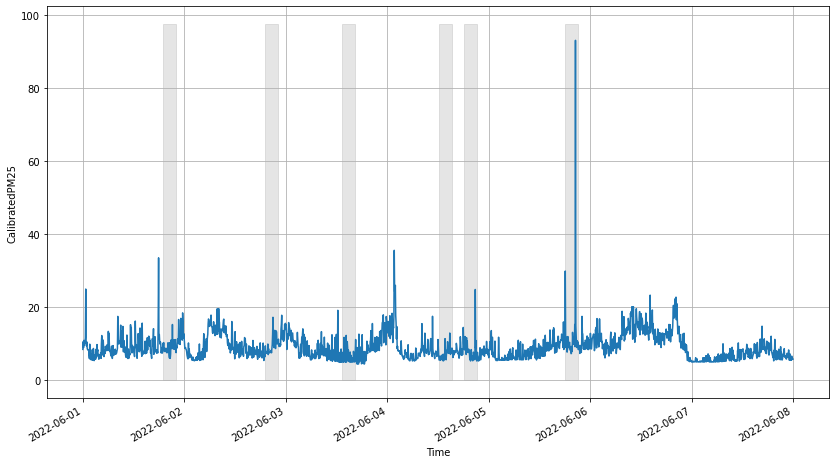

In [74]:
start_date = pd.Timestamp('2022-06-01')
end_date = pd.Timestamp('2022-06-08')
metric = 'CalibratedPM25'

mask = (df.index > start_date) & (df.index < end_date)
ax = df.loc[mask, metric].plot()
cubs_game_dates_subset = [
    date for date in cubs_game_dates if
    (date > start_date) & (date < end_date)
]

ylim = ax.get_ylim()

for _, row in df_cubs.iterrows():
    date = pd.to_datetime(row['START DATE'])
    if (date < start_date) | (date > end_date):
        continue
    game_start = dt.datetime.combine(date, pd.to_datetime(row['START TIME']).time())
    game_end = dt.datetime.combine(date, pd.to_datetime(row['END TIME']).time())
    ax.fill_between([game_start, game_end], ylim[0], ylim[1], alpha=.2, color='gray')
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel(metric)

In [75]:
(game_end - game_start)

datetime.timedelta(seconds=10800)